In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\regin\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
#os.environ['PROJ_LIB'] = r'C:\Users\Work\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

In [2]:
method = 'MVA'                  #change accordingly for calibration method: MVA, CCR, LR
#init_date = ['0328','0331','0404','0407','0411','0414','0418','0421','0425']
init_date = '0328'              #change accordingly
#week_no = ['1','2','3','4']    
week_no = '1'                   #change accordingly

###################################################################################

dir1 = '/Users/regin/Desktop/S2Scalibrationextremeheatpart2/data/model/ecmwf/temp/'
my_nc_file = dir1 + 'ecmwf_tas_2016' + init_date + '_week' + week_no + '_format.nc'
data = Dataset(my_nc_file, mode='r')

dir2 = '/Users/regin/Desktop/S2Scalibrationextremeheatpart2/data/calibrated_weekly_temp/'
my_cal_file = dir2 + 'fcst_cal_' + method + '_2016' + init_date + '_week' + week_no + '.nc'
fcst_data = Dataset(my_cal_file, mode='r')

dir3 = '/Users/regin/Desktop/S2Scalibrationextremeheatpart2/data/obs/'
obs_file = dir3 + 'era5_tas_2016' + init_date + '_week' + week_no + '_format.nc'
obs_data = Dataset(obs_file, mode='r')

In [3]:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
tass = data.variables['tas'][:]
obs_tass = obs_data.variables['tas'][:]
fcst_tass = fcst_data.variables['tas'][:]
data.close()
obs_data.close()
fcst_data.close()
ens_mean = np.mean(tass, axis=(0,1))
cal_mean = np.mean(fcst_tass, axis=(0,1))
obs_mean = np.mean(obs_tass, axis=(0))
bias_raw = ens_mean - obs_mean
print(np.min(bias_raw))
print(np.max(bias_raw))
bias_cal = cal_mean - obs_mean
print(np.min(bias_cal))
print(np.max(bias_cal))

-2.9407654
0.7017517
-0.04748535
0.08526611


C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: MatplotlibDeprecationWarning: 
The dedent function was deprecated in 

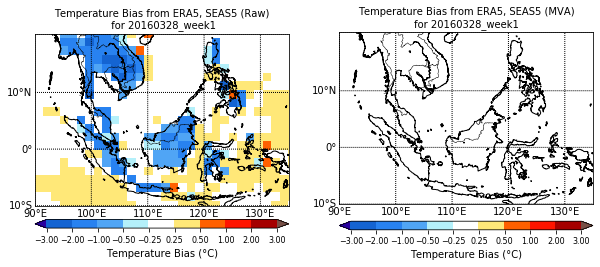

In [4]:
# Get some parameters for the Mercator Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

fig = plt.figure(figsize=(10,10))

#first plot
ax = fig.add_subplot(1,2,1)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

#m = Basemap(llcrnrlon=90, llcrnrlat=-10.5,
#            urcrnrlon=141,urcrnrlat=21.5,
#            projection='merc', resolution = 'i',
#            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D, use meshgrid to create 2D arrays
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Set the color scale
cmap = mpl.colors.ListedColormap(["#1464d2","#2882f0","#50a5f5","#b4f0fa","#ffffff","#ffe878","#ff6000","#ff1400", "#a50000"])
label = "Temperature Bias (°C)"
bounds = [-3, -2, -1, -0.5, -0.25, 0.25, 0.5, 1, 2, 3]
cmap.set_under(color = "#2800a0")
cmap.set_over(color = "#785046")
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plot Data
cs = m.pcolormesh(xi,yi,np.squeeze(bias_raw),cmap=cmap,norm=norm)

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="8%", extend = 'both')
cbar.set_label(label,fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Add Title
plt.title('Temperature Bias from ERA5, SEAS5 (Raw)\n for 2016' + init_date + '_week' + week_no,fontsize=10)
######################################################################################################################
# Second plot
ax = fig.add_subplot(1,2,2)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D, use meshgrid to create 2D arrays
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Set the color scale
cmap = mpl.colors.ListedColormap(["#1464d2","#2882f0","#50a5f5","#b4f0fa","#ffffff","#ffe878","#ff6000","#ff1400", "#a50000"])
label = "Temperature Bias (°C)"
bounds = [-3, -2, -1, -0.5, -0.25, 0.25, 0.5, 1, 2, 3]
cmap.set_under(color = "#2800a0")
cmap.set_over(color = "#785046")
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plot Data
cs = m.pcolormesh(xi,yi,np.squeeze(bias_cal),cmap=cmap,norm= norm)

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%", extend = 'both')
cbar.set_label(label,fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Add Title
plt.title('Temperature Bias from ERA5, SEAS5 (' + method + ')\n' + 'for 2016' + init_date + '_week' + week_no,fontsize=10)

#plt.tight_layout()
plt.show()